## 21 类型变量的直方图 （Histogram for Categorical Variable）
类型变量的直方图显示该变量的频率分布。 通过对条形图进行着色，可以将分布与表示颜色的另一个类型变量相关联。

In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.3
0.11.0


In [2]:
# Import Data
df = pd.read_csv("datasets/mpg_ggplot2.csv")
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [3]:
df.groupby(['manufacturer','class']).count()

model  displ  year  cyl  trans  drv  cty  hwy  fl
manufacturer class                                                        
audi         compact        15     15    15   15     15   15   15   15  15
             midsize         3      3     3    3      3    3    3    3   3
chevrolet    2seater         5      5     5    5      5    5    5    5   5
             midsize         5      5     5    5      5    5    5    5   5
             suv             9      9     9    9      9    9    9    9   9
dodge        minivan        11     11    11   11     11   11   11   11  11
             pickup         19     19    19   19     19   19   19   19  19
             suv             7      7     7    7      7    7    7    7   7
ford         pickup          7      7     7    7      7    7    7    7   7
             subcompact      9      9     9    9      9    9    9    9   9
             suv             9      9     9    9      9    9    9    9   9
honda        subcompact      9      9     9    9      9    9    9    9   9
hyundai      midsize         7      7     7    7      7    7    7    7   7
             subcompact      7      7     7    7      7    7    7    7   7
jeep         suv             8      8     8    8      8    8    8    8   8
land rover   suv             4      4     4    4      4    4    4    4   4
lincoln      suv             3      3     3    3      3    3    3    3   3
mercury      suv             4      4     4    4      4    4    4    4   4
nissan       compact         2      2     2    2      2    2    2    2   2
             midsize         7      7     7    7      7    7    7    7   7
             suv             4      4     4    4      4    4    4    4   4
pontiac      midsize         5      5     5    5      5    5    5    5   5
subaru       compact         4      4     4    4      4    4    4    4   4
             subcompact      4      4     4    4      4    4    4    4   4
             suv             6      6     6    6      6    6    6    6   6
toyota       compact        12     12    12   12     12   12   12   12  12
             midsize         7      7     7    7      7    7    7    7   7
             pickup          7      7     7    7      7    7    7    7   7
             suv             8      8     8    8      8    8    8    8   8
volkswagen   compact        14     14    14   14     14   14   14   14  14
             midsize         7      7     7    7      7    7    7    7   7
             subcompact      6      6     6    6      6    6    6    6   6

In [4]:
# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

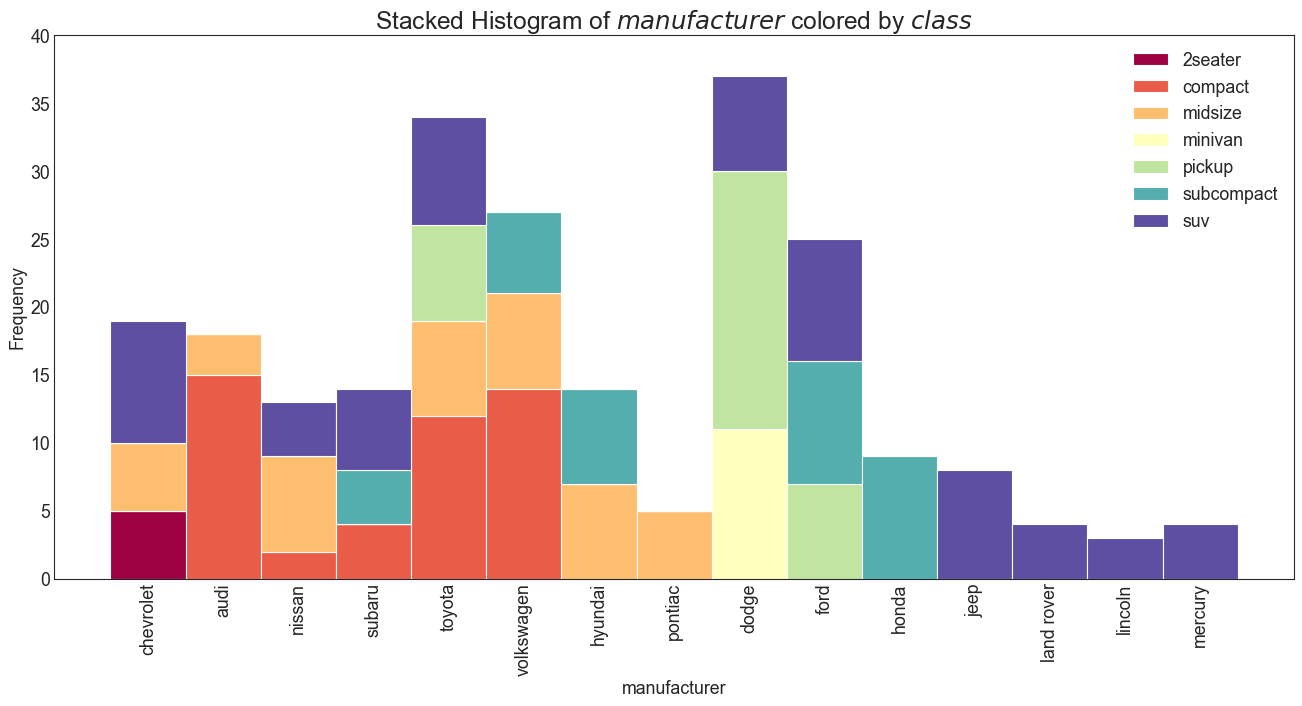

In [5]:
# Draw
plt.figure(figsize=(20,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)

plt.ylabel("Frequency")
plt.ylim(0, 40)

bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(ticks=np.arange(min(bins)+bin_w/2, max(bins), bin_w),rotation=90) # 将x轴标签位置设置到每个“柱子”中间。原作者代码为matplotlib老版本，此处不适用，见后文

# plt.xlim(0, 16)
plt.show()

ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (15).

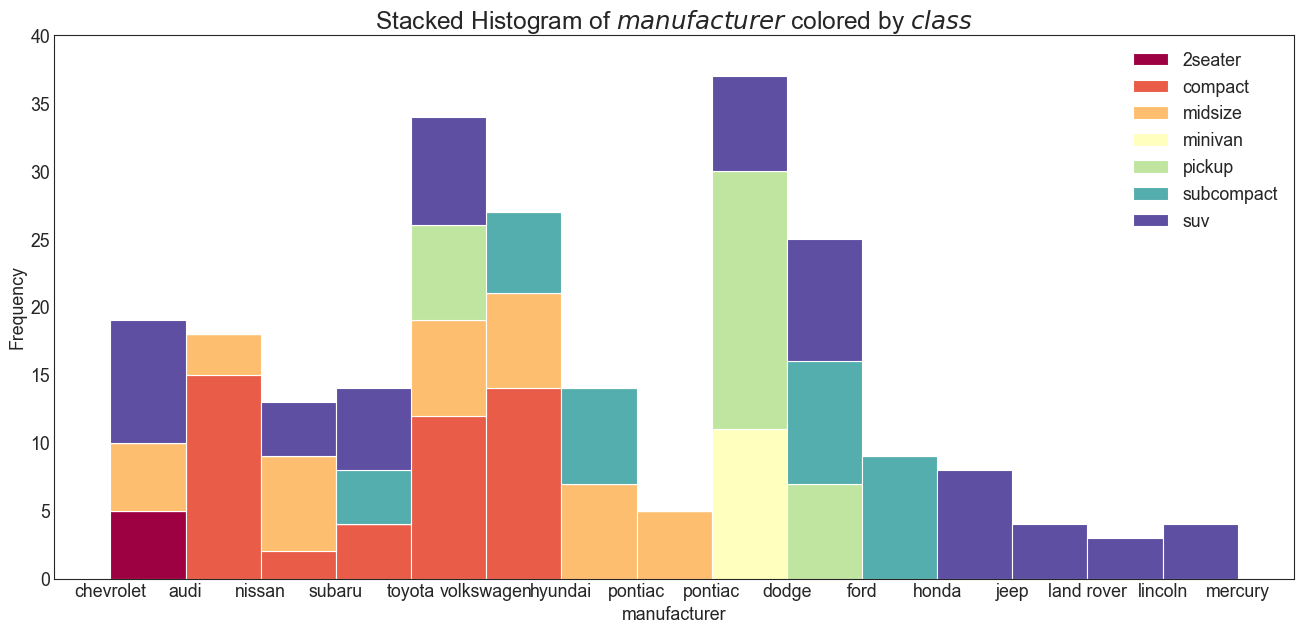

In [6]:
# Draw
plt.figure(figsize=(20,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)

plt.ylabel("Frequency")
plt.ylim(0, 40)

plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='right')# 此为原作者代码，适配matplotlib老版本。新版本不适用

plt.show()